# COGS 118A - Final Project

# Insert title here

## Group members

- Junhui Wen
- Huiyi He
- Xinyi(Cindy) Wang
- Demi Mao
- Jiayi Zhu

# Abstract 
Mobile devices have become a central part of people’s everyday lives, so it is necessary for mobile companies to understand the needs and requirements of their customers. Thus, our primary objective is to predict the price range of mobile phones given some information about a mobile phone such as battery power, clock speed, and RAM. The data we found is collected from different mobile phone companies on Kaggle. Each observation records some basic information about a phone without directly telling its model.

We will do some data wrangling to remove null values, if there are some. Then, we will convert them to the right type for analysis. After that, we will perform exploratory data analysis to identify patterns and gain insights for modeling. Then we split the data into a training and testing set, select an appropriate machine learning algorithm and train on the training set. Finally, we deploy the model to make predictions on the test set. We will first measure the performance of our classifier by the accuracy/error rate. We also want to pay attention to the F1-score, which tells whether we have a balanced measure of precision and recall. 

# Background

Since the last decade, the telecommunication industry has experienced great revolutions as mobile devices have become part of people’s everyday lives. With about 100 million mobile phone sales per year, the success of the mobile industry is highly dependent on its consumers<a name="sell_data"></a>[<sup>[1]</sup>](#sell_data). Thus, the need and satisfaction of the user should be carefully considered when designing mobile devices and deciding the price. According to a publication of user experiences in mobile phones, by examining the correlation between several features and applying multiple regression, the size and color depth of the color screen, and the speed of webrosing of wireless connectivity are the one that is mostly related to the user satisfaction. The research paper also indicates that the presence of the camera does not affect the user's satisfaction level. However, since the study was conducted in 2006, and the technology for most camera phones were not mature enough at that time, the picture quality might be really bad, so the camera of the phone is not actually used by the user<a name="Ling"></a>[<sup>[3]</sup>](#Ling). However there is no recent research on the effectiveness of mobile phones on user preference. 

In addition to basic understanding of how the features of the mobile phone affect the user's choices, there are research papers focusing on classifying mobile phone prices based on four physical features of the mobile phone: random accessing memory, the power of the battery, and the width and height of px. Among all four machine learning algorithms: Support Vector Machines, Decision Tree, K-Nearest Neighbor, and Naive Bayes Classification. The Support Vector Machines have the highest performance based on the standard performance matrix of accuracy, precision, recall, and F1 score with and without feature selection<a name="Hu"></a>[<sup>[2]</sup>](#Hu), and the accuracy for SVM is 94.8 without feature selection and 97.7 with feature selection. In the same year 2022, another paper on classification on the price range of the mobile phone tested decision tree, random forest, and hybrid enable model of five different heterogeneous weak models was used and got respective results 85%, 91% and 96%. This provides us with some prior knowledge on algorithm selection and understanding <a name="Sakib"></a>[<sup>[4]</sup>](#Sakib).

# Problem Statement

The problem we aim to address is to accurately predict mobile phone price ranges (represented by 0 to 4, which refers to the low price level, median price level, high price level and very high price level according to the aveage pricing of the current market) based on product characteristics, including battery power, clock speed, and RAM. Since our dataset has multiple features, one potential solution is random forest. Our problem is quantifiable as the phone features in the dataset can be represented as numerical data points, and the price range can be categorized into several different classes, making the problem expressible in mathematical terms. Moreover, the problem is measurable. The accuracy serves as a clear metric to evaluate the model. Metrics such as accuracy, precision, recall, and the F1-score can be used to assess our predictions. Finally, our problem is replicable. Our problem is based on a dataset that contains diverse phone models from various companies. As long as we have necessary features of the mobile phone, we can apply our model to predict the price range.

# Data

The dataset we will be using for this task is accessible via the following link: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv
The dataset contains 21 variables, 1000 observations. Each observation contains information regarding the mobile phone's ID, battery power, Bluetooth capability, clock speed, dual SIM functionality, front camera megapixels (fc), 4G compatibility, internal memory, mobile depth (m_dep), mobile weight (mobile_wt), among other features.
Before applying our Random Forest model, we will perform a thorough data cleaning and transformation process. Initially, we will check for missing values and decide whether to remove or impute the corresponding rows or columns based on the extent and nature of these missing values. We will also handle any incorrect values or outliers present in the dataset, taking care to ensure that the integrity of the data is maintained.
Lastly, during the data transformation phase, we will examine the distribution of our data. If we find that our data is skewed, we might consider applying certain transformations, such as square root transformations, to create a more normally distributed dataset. 

Critical variables:
`battery_power`: total energy a battery can store in one time measured in mAh. This is an integer in range 500 to 1999
`blue`: has bluetooth or not. It’s represented by 1 (has bluetooth) or 0 (doesn’t have bluetooth)
`clock_speed`: speed at which a microprocessor executes instructions. This is a decimal number between 0.5 and 3
`dual_sim`: has dual sim support or not. It's represented by 1 (supports dual sim) and 0 (does not support dual sim).
`int_memory`: internal memory in gigabytes. It’s represented by an integer in range 2 to 64.

# Proposed Solution

We will split the whole dataset into a train and test set. Within the training set, we further take some proportion out for the purpose of validation. While training the model using Random Forest, we will use k-fold cross validation and gridsearch to find the best parameter in order to find the best parameter. Then, we evaluate the best model on the testing set by metrics like accuracy and F1-score. After this, we will finally do a feature importance analysis to see which features are most influential in determining the price range. 

This solution would work because random forest can handle a large number of complex features compared to simple models like SVM. Also, random forest is very robust to outliers and unimportant features, so it should be a very good algorithm for the given problem.

We will be comparing our model with the SVM model mentioned in the paper<a name="bg3"></a>[<sup>[3]</sup>](#bg3note).

# Evaluation Metrics

To evaluate the performance of our prediction model, we will look at the accuracy and F1 values. Accuracy will show us the correctly predicted instances’ proportion to the total number of instances. F1 reflects the balance between precision and recall. A larger F1 score indicates a good trade-off between precision and recall and also represents a higher overall performance of a classification model. 

To calculate them, we need the values of True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN). The formula for accuracy is (TP + TN) / (TP + TN + FP + FN). The formula for the F1 score is (2 * Precision * Recall) / (Precision + Recall), also known as (2 * TP) / (2TP + FP + FN). 

The reason we look at accuracy and F1 is that they provide complementary information about the predictor model’s performance to mobile phone price, which gives the mobile phone company insights to set prices for their products. 

Updated from proposal feadback:

In addition to the cofusion matrix of precision, recall, and F1, we will also add in the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) based on the differences between predicted values and actual values. Since there are 4 labels from 0 to 3 with different price range for the predicted result, differences between 0 and 1 in the real prices is smaller than differences between 0 to 3 in the real prices. Thus, we will also consider the RMSE and MAE to quantify how far away our prediction deviated from the real value. The formula of a RMSE = sqrt(sum(actual result - predicted result)^2 / number of samples), and the formula of MAE is abs(acutal result - predicted result)/ number of samples. Our ultimate goal is to find a model that minimize the RMSE and MAE as well as maintain a relatively low F1 score. 

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1. Dataset Wrangling

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.


In [59]:
# pip install graphviz
# brew install graphviz

In [60]:
# for Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For Training
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# for evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [61]:
df = pd.read_csv("train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


There are total of 21 varaibles, with the first 20 varaibles representing the features of the mobile phones and the last varaible representing the label of the price range as explained in the data section. 

In [62]:
print(df.dtypes)

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


In [63]:
# drop all rows with same values of features and with null value in any of the columns
df = df.drop_duplicates()
df = df.dropna()
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [64]:
# getting all the features names for the future use
feature_names = df.columns[:-1]

### Subsection 2. Training and Predicting

Talk about how to train the data and what we got for the result

In [65]:
X = df.to_numpy()[:,:-1]
y = df.to_numpy()[:,-1]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 7, 10],
    'max_features': ['sqrt', 'log2']
}

model = RandomForestClassifier(random_state=23)

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [67]:
results = pd.DataFrame(grid_search.cv_results_['params'] )
results['accuracy'] = grid_search.cv_results_['mean_test_score']

In [68]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# print the best prarameter
print("Best parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)

Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 150}
Accuracy: 0.895


Based on the explaination above, the best hyper-parameters for the random forest classifier based on the grid search is: the maximum depth of the tree is 10, the number is the features taking into account for each decision tree is the square root of all features which is approximatly sqrt(20), the minimum number of sample required to split the node further is 5, and the number of trees in the forest is 150. 

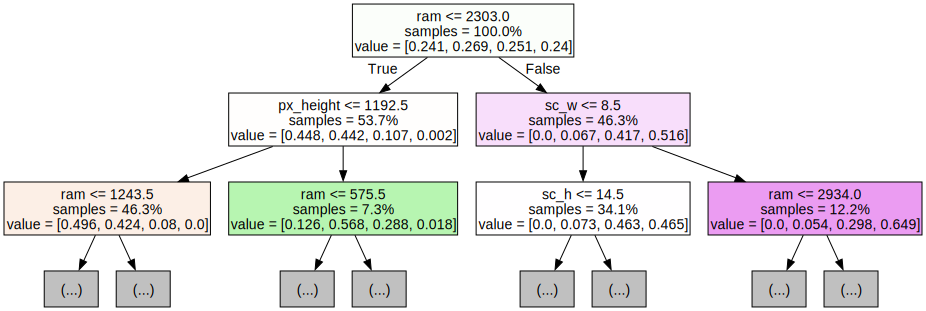

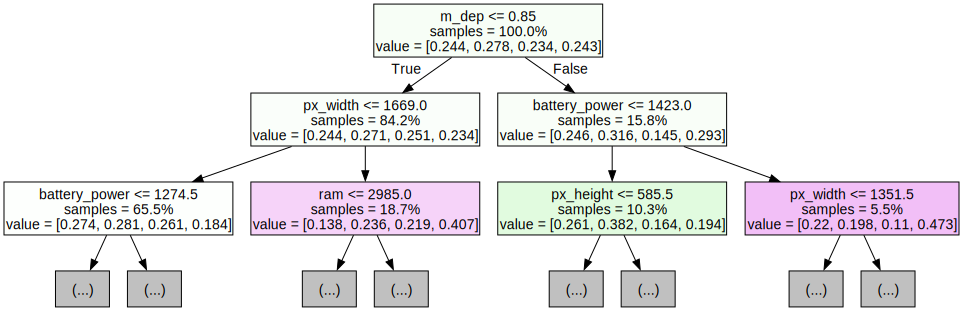

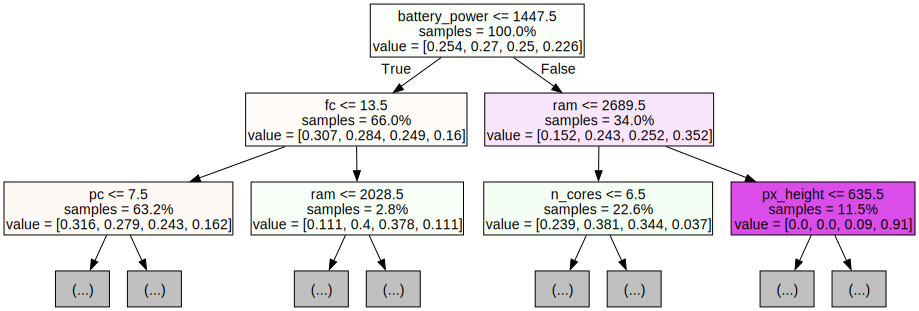

In [69]:
# visulizing the first 3 decision trees of the best_model
for i in range(3):
    tree = best_model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=feature_names,  
                               filled=True,
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

We also want to analysis the how important each features contribute to the overall performance of the random forest. The following two plots shows the calculated feature importances based on the mean decrease in impurity value and the decrease in the model score which is more rebust to the cardinality of the feature.

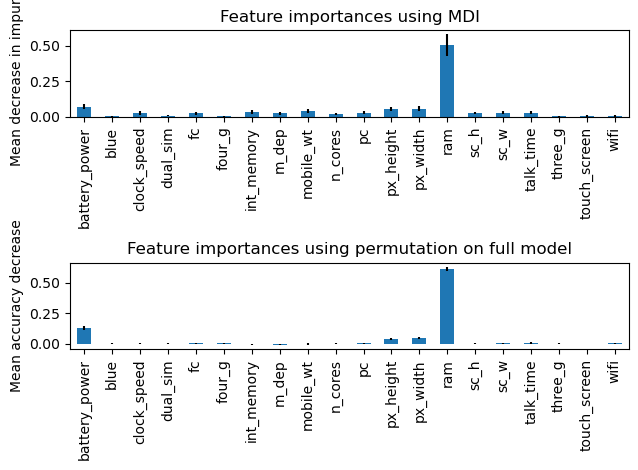

In [70]:
# Calculating the feature importances using impurity
importances = best_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)
forest_importances1 = pd.Series(importances, index=feature_names)

# Calculating the feature importances using permutation of features and overall model score
result = permutation_importance(
    best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances2 = pd.Series(result.importances_mean, index=feature_names)
fig, axs = plt.subplots(2)

forest_importances1.plot.bar(yerr=std, ax=axs[0])
axs[0].set_title("Feature importances using MDI")
axs[0].set_ylabel("Mean decrease in impurity")

forest_importances2.plot.bar(yerr=result.importances_std, ax=axs[1])
axs[1].set_title("Feature importances using permutation on full model")
axs[1].set_ylabel("Mean accuracy decrease")

fig.tight_layout()

The most important features based on both plots are: 
1. random accessing memory, and 
2. battery_power. 

In [71]:
# TODO: 1) add F1 score (and maybe other evaluation metrics)
#       2) feature importances analysis [DONE]
#       3) add more explanation for code above [DONE]
#       4) consider strategies that make the training process less biased toward continuous variables (like RAM)
#       5) copy-and-paste sections from proposal to here [DONE]
#       6) show some decision trees of the best parameters [DONE]

### Subsection 3. Normalization

Talk about why we normalize the dataset, and how does the result after normalization differ from before

In [72]:
scaler = StandardScaler()

cont_var = ['battery_power', 'ram', 'px_height', 'px_width', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt'] 
df[cont_var] = scaler.fit_transform(df[cont_var])
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,0,0.830779,0,-0.762495,0,-1.380644,0.340740,1.349249,2,...,-1.408949,-1.146784,0.391703,9,7,19,0,0,1,1
1,-0.495139,1,-1.253064,1,-0.992890,1,1.155024,0.687548,-0.120059,3,...,0.585778,1.704465,0.467317,17,3,7,1,1,0,2
2,-1.537686,1,-1.253064,1,-0.532099,1,0.493546,1.381165,0.134244,5,...,1.392684,1.074968,0.441498,11,2,9,1,1,0,2
3,-1.419319,1,1.198517,0,-0.992890,0,-1.215274,1.034357,-0.261339,6,...,1.286750,1.236971,0.594569,16,8,11,1,0,0,2
4,1.325906,1,-0.395011,0,2.002254,1,0.658915,0.340740,0.021220,2,...,1.268718,-0.091452,-0.657666,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1,-1.253064,1,-0.992890,1,-1.656260,1.034357,-0.967737,6,...,1.300273,1.477661,-1.342799,13,4,19,1,1,0,0
1996,1.653694,1,1.321096,1,-0.992890,0,0.383299,-1.046495,1.320993,4,...,0.608317,1.651235,-0.085031,11,10,16,1,1,1,2
1997,1.530773,0,-0.762748,1,-0.762495,1,0.217930,0.687548,-0.911225,8,...,0.502383,0.880565,0.860139,9,1,5,1,1,0,3
1998,0.622527,0,-0.762748,0,-0.071307,1,0.769162,-1.393304,0.134244,5,...,-0.696707,-1.345816,-1.157454,18,10,19,1,1,1,0


In [73]:
X_transformed = df.to_numpy()[:,:-1]

# Split the dataset into train and test sets
X_train_transformed, X_test_transformed, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2)

In [74]:
model_tranformed = RandomForestClassifier(random_state=23)

grid_search_transformed = GridSearchCV(model_tranformed, param_grid, cv=5)
grid_search_transformed.fit(X_train_transformed, y_train)

best_model_transformed = grid_search_transformed.best_estimator_

In [75]:
y_pred_transformed = best_model_transformed.predict(X_test_transformed)
accuracy_transformed = accuracy_score(y_test, y_pred_transformed)

# print the best prarameter
print("Best parameters:", grid_search_transformed.best_params_)
print("Accuracy:", accuracy_transformed)

Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 150}
Accuracy: 0.88


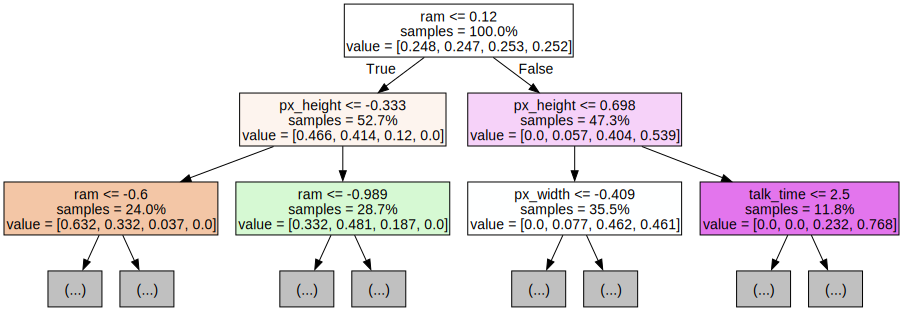

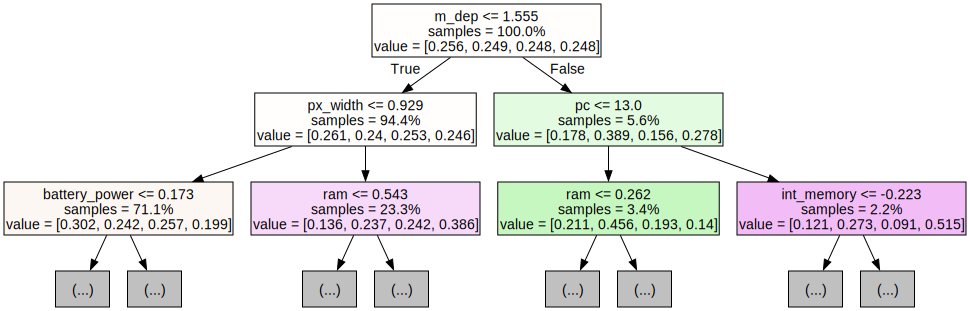

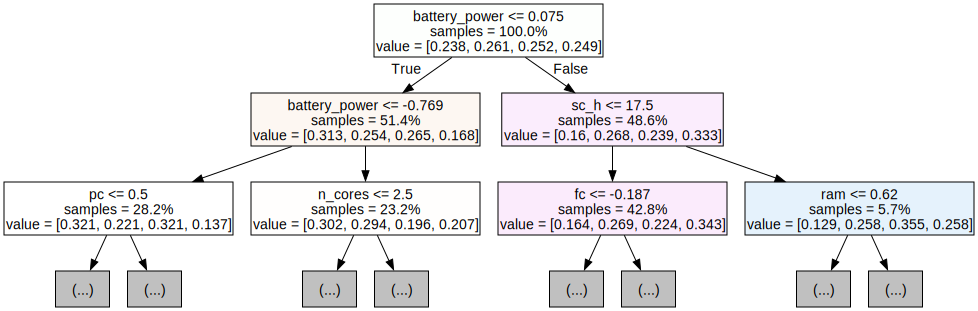

In [76]:
# visulizing the first 3 decision trees of the best_model
for i in range(3):
    tree = best_model_transformed.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=feature_names,  
                               filled=True,
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

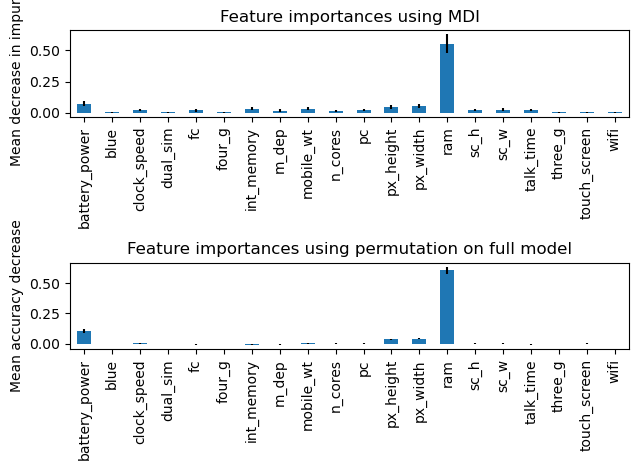

In [77]:
# Calculating the feature importances using impurity
importances = best_model_transformed.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_model_transformed.estimators_], axis=0)
forest_importances1 = pd.Series(importances, index=feature_names)

# Calculating the feature importances using permutation of features and overall model score
result = permutation_importance(
    best_model_transformed, X_test_transformed, y_test, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances2 = pd.Series(result.importances_mean, index=feature_names)
fig, axs = plt.subplots(2)

forest_importances1.plot.bar(yerr=std, ax=axs[0])
axs[0].set_title("Feature importances using MDI")
axs[0].set_ylabel("Mean decrease in impurity")

forest_importances2.plot.bar(yerr=result.importances_std, ax=axs[1])
axs[1].set_title("Feature importances using permutation on full model")
axs[1].set_ylabel("Mean accuracy decrease")

fig.tight_layout()

In [78]:
best_model_transformed.feature_importances_

array([0.07405021, 0.00403752, 0.02230738, 0.0046786 , 0.01987243,
       0.00437301, 0.03307876, 0.01857404, 0.03400356, 0.01814523,
       0.02228912, 0.05025377, 0.05630422, 0.55269183, 0.02340856,
       0.02489117, 0.02414826, 0.00445591, 0.00469055, 0.00374587])

In [79]:
best_model.feature_importances_

array([0.07078507, 0.00526853, 0.02652164, 0.00598683, 0.0233206 ,
       0.00521202, 0.03449026, 0.02398508, 0.03961277, 0.02080529,
       0.02731463, 0.05603902, 0.05644741, 0.50588224, 0.02644991,
       0.02725979, 0.02845464, 0.00500247, 0.00560493, 0.00555687])

After normalizing some of the large continuous variables, we observed that although the values of these features' importance change slightly compared to the raw values, RAM is still the most important feature, followed by the battery power, which in a sense suggests that they are the most important features in predicting the price range of a phone.

### Subsection 4. Measure Benchmark Performance

As mentioned before, we want to compare the best model we got with the benchmark model, which is SVM.

In [80]:
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf','poly','sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [3, 5, 8, 10]
}

svm_model = SVC(random_state=42)

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)
grid_search_svm.fit(X_train_transformed, y_train)

best_svm_model = grid_search_svm.best_estimator_


In [81]:
results_SVM = pd.DataFrame(grid_search_svm.cv_results_['params'] )
results_SVM['accuracy'] = grid_search_svm.cv_results_['mean_test_score']
results_SVM

,C,degree,gamma,kernel,accuracy
0,0.01,3,scale,linear,0.900625
1,0.01,3,scale,rbf,0.251875
2,0.01,3,scale,poly,0.254375
3,0.01,3,scale,sigmoid,0.251875
4,0.01,3,auto,linear,0.900625
...,...,...,...,...,...
123,10.00,10,scale,sigmoid,0.294375
124,10.00,10,auto,linear,0.962500
125,10.00,10,auto,rbf,0.476250
126,10.00,10,auto,poly,0.681875


In [82]:
y_pred_svm = best_svm_model.predict(X_test_transformed)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# print the best prarameter
print("Best parameters:", grid_search_svm.best_params_)
print("Accuracy:", accuracy_svm)

Best parameters: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.985


When comparing to the benchmark, it looks like the SVM with regularization constant C = 10, gamma = scale, and kernel = 'linear' has a better accuracy score than Random Forest. However, this does not necessarily suggest that SVM would always peoform better than Random Forest. The choices of our hyper-parameters in the GridSearchCV method might always have some effects in the final prediction score. If we have more time to run the GridSearch, then we might see some different scores.

### Subsection 5 . Comparison

Talk about how the result of Random Forest after normalization differs from the best mode lfrom benchmark

For Random Forest:
For label 0:
TP=94, TN=291, FP=10, FN=5
Accuracy=0.9625, f1=0.9261083743842364

For label 1:
TP=80, TN=285, FP=18, FN=17
Accuracy=0.9125, f1=0.8205128205128205

For label 2:
TP=82, TN=285, FP=14, FN=19
Accuracy=0.9175, f1=0.83248730964467

For label 3:
TP=96, TN=291, FP=6, FN=7
Accuracy=0.9675, f1=0.9365853658536586

overall Accuracy=0.94, Overall f1=0.8789234675988463

The mean absolute error is: 0.12
The RMSE is: 0.35


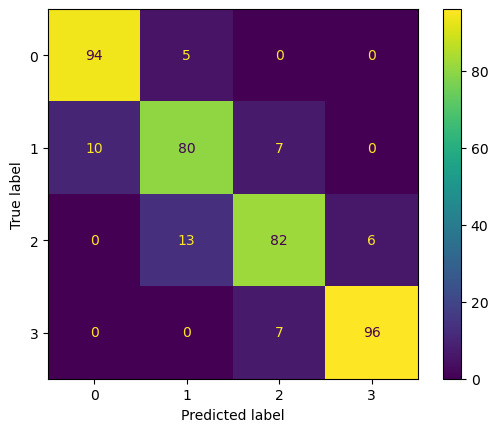

In [85]:
## evaluation for Random Forest
print('For Random Forest:')

predictions = best_model_transformed.predict(X_test_transformed)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# To display the confusion matrix
disp.plot()  

def calculate_metrics(cm):
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    recall = TP / (TP + FN)
    specificity = TN / (TN + FP)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    f1 =  (2 * precision * recall) / (precision + recall)

    return TP, TN, FP, FN, accuracy, f1

TP, TN, FP, FN, accuracy, f1 = calculate_metrics(cm)

# Adjust according to the number of classes
for i in range(4):
    print(f'For label {i}:')
    print(f'TP={TP[i]}, TN={TN[i]}, FP={FP[i]}, FN={FN[i]}')
    print(f'Accuracy={accuracy[i]}, f1={f1[i]}\n')
print(f'overall Accuracy={(accuracy.sum()/len(accuracy))}, Overall f1={f1.sum()/len(f1)}\n')

mae = mean_absolute_error(y_test,predictions)
print("The mean absolute error is: {:.2f}".format(mae))
rmse = mean_squared_error(y_test, predictions, squared=False)
print("The RMSE is: {:.2f}".format(rmse))

For Support Vector machine:
For label 0:
TP=99, TN=298, FP=3, FN=0
Accuracy=0.9925, f1=0.9850746268656716

For label 1:
TP=94, TN=303, FP=0, FN=3
Accuracy=0.9925, f1=0.9842931937172774

For label 2:
TP=100, TN=297, FP=2, FN=1
Accuracy=0.9925, f1=0.9852216748768472

For label 3:
TP=101, TN=296, FP=1, FN=2
Accuracy=0.9925, f1=0.9853658536585367

overall Accuracy=0.9925, Overall f1=0.9849888372795832

The mean absolute error is: 0.01
The RMSE is: 0.12


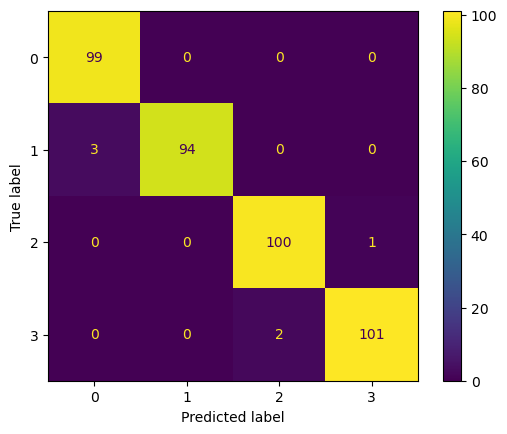

In [86]:
## evaluation for Random Forest

print('For Support Vector machine:')

predictions_svm = best_svm_model.predict(X_test_transformed)
cm_svm = confusion_matrix(y_test, predictions_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)

# To display the confusion matrix
disp_svm.plot()  

TP, TN, FP, FN, accuracy, f1 = calculate_metrics(cm_svm)

# Adjust according to the number of classes
for i in range(4):
    print(f'For label {i}:')
    print(f'TP={TP[i]}, TN={TN[i]}, FP={FP[i]}, FN={FN[i]}')
    print(f'Accuracy={accuracy[i]}, f1={f1[i]}\n')
print(f'overall Accuracy={(accuracy.sum()/len(accuracy))}, Overall f1={f1.sum()/len(f1)}\n')

mae = mean_absolute_error(y_test,predictions_svm)
print("The mean absolute error is: {:.2f}".format(mae))
rmse = mean_squared_error(y_test, predictions_svm, squared=False)
print("The RMSE is: {:.2f}".format(rmse))

# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
